In [1]:
%matplotlib inline 
from sets import Set
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

/Users/nicochaves/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/nicochaves/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: the sets module is deprecated
  from ipykernel import kernelapp as app


## Read in the Data

In [2]:
vcf_data = pd.read_csv('data/preprocessed/vcf_features_with_labels.txt', sep='\t')

## Extract The Raw Data (the full data frame also contains some of VQSR's output data)

In [11]:
feature_names = list({'AC',
 'AF',
 'AN',
 'BaseQRankSum',
 'ClippingRankSum',
 'DP',
 'FS',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQ0',
 'MQRankSum',
 'QD',
 'ReadPosRankSum',
 'SOR'})

vcf_raw_data = vcf_data[feature_names]

## Data Visualization Using T-SNE

In [12]:
def plot_embedding(embedding):
    """
    Plot a 2-dimensional embedding of a dataset
    :param embedding: The embedding
    :return: None
    """

    fig, ax = plt.subplots(figsize = (10,10))
    plt.plot(embedding[:,0], embedding[:,1], 'bo')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

### T-SNE Embedding without Any Labeling

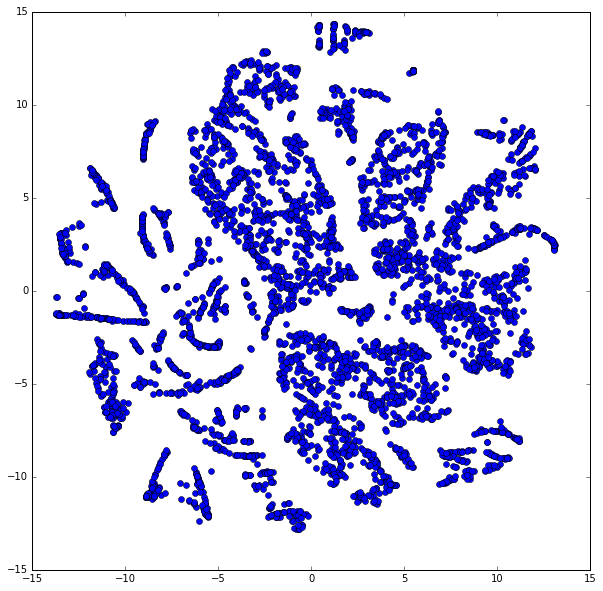

In [13]:
num_data_points_to_embed = 5000 # Take a subset of the data to speed up the execution
model = TSNE(n_components=2, random_state=0)
embedding = model.fit_transform(vcf_raw_data[:num_data_points_to_embed])
plot_embedding(embedding)

### Label the T-SNE Embedding using the VQSR Filter's Output Labels

In [14]:
passed_vqsr = vcf_data['PASSED_VQSR'] # the output label according to VQSR

In [15]:
vqsr_pos_indices = passed_vqsr[passed_vqsr == 1].index
vqsr_pos_indices = [i for i in vqsr_pos_indices if i < num_data_points_to_embed]
vqsr_neg_indices = passed_vqsr[passed_vqsr == 0].index;
vqsr_neg_indices = [i for i in vqsr_neg_indices if i < num_data_points_to_embed]

vqsr_pos_embedding = embedding[vqsr_pos_indices];
vqsr_neg_embedding = embedding[vqsr_neg_indices];

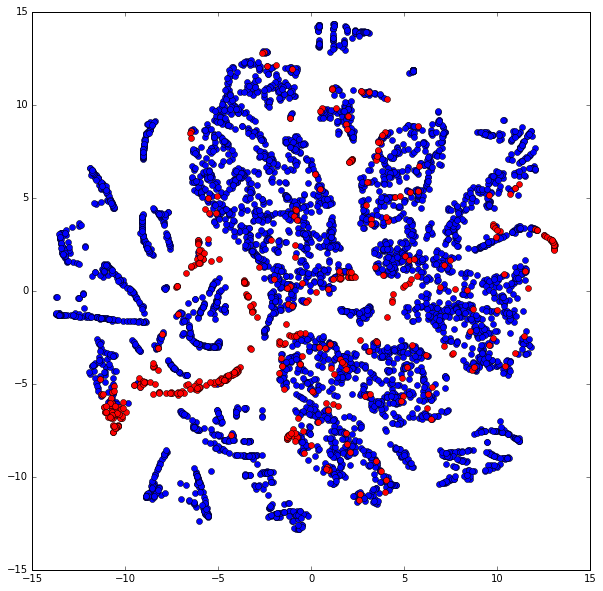

In [16]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(vqsr_pos_embedding[:,0], vqsr_pos_embedding[:,1], 'bo')
plt.plot(vqsr_neg_embedding[:,0], vqsr_neg_embedding[:,1], 'ro')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### There appears to be a small amount of clustering in the embedding. So VQSR is at least finding some structure in the data. 

## TODO: Do the same as above but use Ground Truth for Labels rather than VQSR. This will determine how much structure is in the actual data rather than just how much structure the VQSR model finds.